In [14]:
# C:\Mark\uni\Uni Work\5th Year\Diss\ROC Surfaces\adni_noNA.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

%matplotlib notebook

In [15]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')
df['gender_recoded'] = df['gender']-1
df

,Unnamed: 0,RID,APOE4,MMSE,age,gender,educ,DX,abeta,tau,LeftHipp,RightHipp,Hipp,HCI,gender_recoded
0,1,2002,0,28,65,1,16,2,293,254,3.919,4.041,7.960,8.5163,0
1,2,2002,0,28,65,1,16,2,293,254,3.803,4.033,7.836,8.5163,0
2,3,2010,1,30,63,2,20,2,444,729,4.045,3.957,8.002,4.9071,1
3,4,2010,1,30,63,2,20,2,444,729,4.001,4.003,8.004,4.9071,1
4,5,2018,0,29,76,2,18,2,500,559,3.789,3.965,7.754,8.7040,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1030,5290,1,29,67,2,12,1,1808,1620,3.782,3.759,7.541,4.9309,1
1028,1031,5292,0,30,74,2,13,1,1850,1330,3.397,3.705,7.102,6.8485,1
1029,1032,5295,1,29,75,2,15,1,802,1792,2.657,3.271,5.928,18.9298,1
1030,1033,5296,0,29,69,1,14,1,270,569,5.140,5.392,10.532,10.1158,0


In [16]:
cov1 = 'age'
cov2 = 'gender_recoded'

d1 = df[df['DX'] == 1]
d2 = df[df['DX'] == 2]
d3 = df[df['DX'] == 3]

d1m = d1[d1[cov2] == 0]
d2m = d2[d2[cov2] == 0]
d3m = d3[d3[cov2] == 0]

d1f = d1[d1[cov2] == 1]
d2f = d2[d2[cov2] == 1]
d3f = d3[d3[cov2] == 1]

<IPython.core.display.Javascript object>


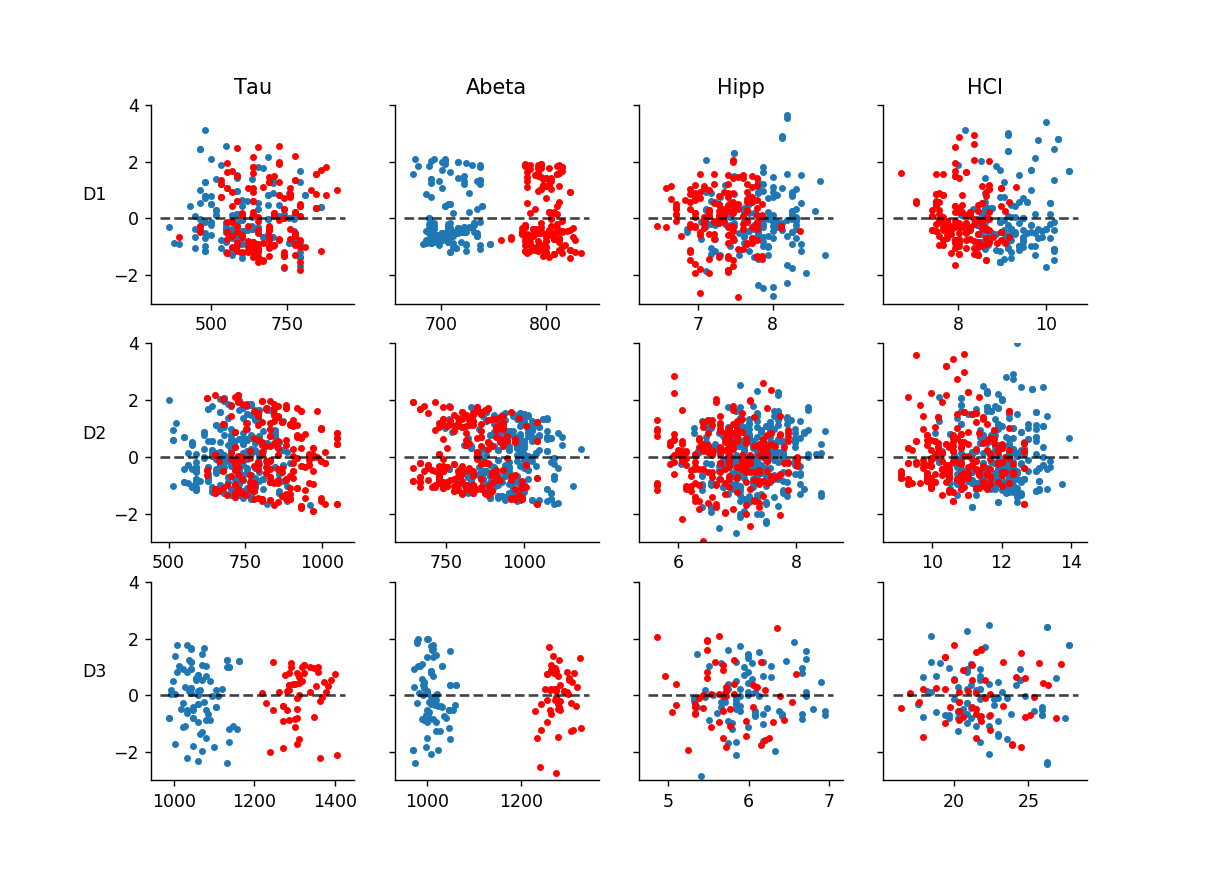

In [42]:
fig, ax = plt.subplots(3,4)

counti = 0
countj = 0

rmveaxis = True
reverse = False

for i in [d1, d2, d3]:
    for j in ['tau', 'abeta', 'Hipp', 'HCI']:
        #ax[counti, countj].plot(i['age'], i[j], '.')
        ax[counti, countj].tick_params(left = True, right = False , labelleft = True, labelbottom=True)
        
#         ages = np.arange(55,90).reshape(-1, 1)
#         reg = LinearRegression().fit(np.array(i['age']).reshape(-1, 1), i[j])
        #print(i)
        # Pick out only the marker values
        d_marker = np.array(i[j])
        
        if reverse:
            d_marker = np.array([-i for i in d_marker])

        # Pick out only the ages
        d_age= np.array(i[cov1])

        # Pick out only the gender (recoded to 0 for men and 1 for women)
        d_gender= np.array(i[cov2])

        # Reshape the data to work with sklearn
        d_age = d_age.reshape(-1, 1)
        d_marker = d_marker.reshape(-1, 1)
        d_gender = d_gender.reshape(-1, 1)
        
        male_indices = [i for i in range(len(d_gender)) if d_gender[i] == 0]
        female_indices = [i for i in range(len(d_gender)) if d_gender[i] == 1]

        X = np.array([[d_age[i][0], d_gender[i][0]] for i in range(len(d_marker))])

        pred_array1 = ([[i, 0] for i in np.arange(50,91)])
        pred_array2 = ([[i, 1] for i in np.arange(50,91)])
        pred_array = np.array(pred_array1 + pred_array2)

        # Fit the linear model and find the parameters and the standard residual error for healthy
        reg = LinearRegression().fit(X, d_marker)
        beta = [reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]]
        
        # Calculate sigma hat
        y_hat = reg.predict(X)
        residuals = d_marker - y_hat
        #residual_sum_of_squaresd1 = residualsd1.T @ residualsd1
        #sigmad1 = np.sqrt(residual_sum_of_squaresd1/(len(d1_marker)-2))
        #sigmad1 = sigmad1[0][0]
        
        #print(residuals)
        
        #print(y_hat[0], residuals[0])
        
        #print(male_indices, female_indices)
        
        for index in male_indices:
            ax[counti, countj].plot(y_hat[index][0], residuals[index][0]/np.std(residuals), '.' , c='#1f77b4')
            
        for index in female_indices:
            ax[counti, countj].plot(y_hat[index][0], residuals[index][0]/np.std(residuals), 'r.')
        
        minx, maxx = ax[counti, countj].get_xlim()
        ax[counti, countj].plot([minx,maxx],np.zeros(2), 'k--', alpha=0.75)
        
        if rmveaxis:
            # Tau column
            if countj != 0:
               ax[counti, countj].tick_params(left = True, right = False , labelleft = False, labelbottom=True)

            # First two rows
            #if counti != 2:
            #   ax[counti, countj].tick_params(left = False, right = False, labelbottom=False)
            
        ax[counti, countj].spines['right'].set_visible(False)
        ax[counti, countj].spines['top'].set_visible(False)
        
#         ax[counti, countj].set_xlim(55,90)
#         ax[counti, countj].set_xticks([55,65,75,85,90])
        
        if countj == 0 and counti == 0:
            ax[counti, countj].set_title('$\mathrm{Tau}$')
        elif countj == 1 and counti == 0:
            ax[counti, countj].set_title('Abeta')
        elif countj == 2 and counti == 0:
            ax[counti, countj].set_title(j)
        elif countj == 3 and counti == 0:
            ax[counti, countj].set_title(j)
            
        if countj == 0 and counti == 0:
            ax[counti, countj].set_ylabel('D1', rotation=0, ha='right')
        elif countj == 0 and counti == 1:
            ax[counti, countj].set_ylabel('D2', rotation=0, ha='right')
        elif countj == 0 and counti == 2:
            ax[counti, countj].set_ylabel('D3', rotation=0, ha='right')
        
        ax[counti, countj].set_ylim(-3,4)
        
        countj+=1
        
    countj=0
    counti+=1
